In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2023-01-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2023_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-01-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8925,남구,8925,남구,0,0.0%,"8,925"
1,2023-01-12,간장,오복왕표 0.9ℓ 1병,7147,남구,7147,남구,0,0.0%,"7,147"
2,2023-01-12,갈치,60cm정도 500g 1마리(냉동),6133,남구,16500,남구,10367,169.04%,"11,317"
3,2023-01-12,고등어,30㎝정도 500g 1마리,4985,남구,8125,남구,3140,62.99%,"6,555"
4,2023-01-12,달걀,오경슈퍼란60g정도 10개,3990,남구,4180,남구,190,4.76%,"4,085"
5,2023-01-12,닭고기,육계 1.0㎏,8490,남구,10600,남구,2110,24.85%,"9,545"
6,2023-01-12,대파,1.0㎏,2880,남구,4865,남구,1985,68.92%,"3,873"
7,2023-01-12,돼지고기,삼겹살 500g,9950,남구,18900,남구,8950,89.95%,"14,425"
8,2023-01-12,두부,500g 판두부(국산포장두부 420g) 1모,5194,남구,5194,남구,0,0.0%,"5,194"
9,2023-01-12,라면,신라면 120g 1봉지,820,남구,820,남구,0,0.0%,820


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2023-04-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2023_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-04-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8925,남구,9675,남구,750,8.4%,"9,300"
1,2023-04-13,간장,오복왕표 0.9ℓ 1병,7147,남구,7147,남구,0,0.0%,"7,147"
2,2023-04-13,갈치,60cm정도 500g 1마리(냉동),6466,남구,14444,남구,7978,123.38%,"10,455"
3,2023-04-13,고등어,30㎝정도 500g 1마리,5980,남구,8000,남구,2020,33.78%,"6,990"
4,2023-04-13,달걀,오경슈퍼란60g정도 10개,3980,남구,3990,남구,10,0.25%,"3,985"
5,2023-04-13,닭고기,육계 1.0㎏,8490,남구,11225,남구,2735,32.21%,"9,858"
6,2023-04-13,대파,1.0㎏,2980,남구,3752,남구,772,25.91%,"3,366"
7,2023-04-13,돼지고기,삼겹살 500g,12450,남구,17900,남구,5450,43.78%,"15,175"
8,2023-04-13,두부,500g 판두부(국산포장두부 420g) 1모,5194,남구,5194,남구,0,0.0%,"5,194"
9,2023-04-13,라면,신라면 120g 1봉지,820,남구,820,남구,0,0.0%,820


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2023-07-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2023_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-07-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7185,남구,8925,남구,1740,24.22%,"8,055"
1,2023-07-13,간장,오복왕표 0.9ℓ 1병,7147,남구,7147,남구,0,0.0%,"7,147"
2,2023-07-13,갈치,60cm정도 500g 1마리(냉동),6644,남구,14666,남구,8022,120.74%,"10,655"
3,2023-07-13,고등어,30㎝정도 500g 1마리,3737,남구,5921,남구,2184,58.44%,"4,829"
4,2023-07-13,달걀,오경슈퍼란60g정도 10개,3990,남구,4280,남구,290,7.27%,"4,135"
5,2023-07-13,닭고기,육계 1.0㎏,7500,남구,10600,남구,3100,41.33%,"9,050"
6,2023-07-13,대파,1.0㎏,3280,남구,4100,남구,820,25.0%,"3,690"
7,2023-07-13,돼지고기,삼겹살 500g,12450,남구,20900,남구,8450,67.87%,"16,675"
8,2023-07-13,두부,500g 판두부(국산포장두부 420g) 1모,5194,남구,5194,남구,0,0.0%,"5,194"
9,2023-07-13,라면,신라면 120g 1봉지,780,남구,780,남구,0,0.0%,780


In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2023-10-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2023_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2023-10-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8925,남구,9675,남구,750,8.4%,"9,300"
1,2023-10-12,간장,오복왕표 0.9ℓ 1병,7147,남구,7147,남구,0,0.0%,"7,147"
2,2023-10-12,갈치,60cm정도 500g 1마리(냉동),9966,남구,13200,남구,3234,32.45%,"11,583"
3,2023-10-12,고등어,30㎝정도 500g 1마리,3557,남구,6000,남구,2443,68.68%,"4,779"
4,2023-10-12,달걀,오경슈퍼란60g정도 10개,3990,남구,4280,남구,290,7.27%,"4,135"
5,2023-10-12,닭고기,육계 1.0㎏,8990,남구,11975,남구,2985,33.2%,"10,483"
6,2023-10-12,대파,1.0㎏,3980,남구,4988,남구,1008,25.33%,"4,484"
7,2023-10-12,돼지고기,삼겹살 500g,12950,남구,19900,남구,6950,53.67%,"16,425"
8,2023-10-12,두부,500g 판두부(국산포장두부 420g) 1모,3033,남구,5194,남구,2161,71.25%,"4,114"
9,2023-10-12,라면,신라면 120g 1봉지,780,남구,780,남구,0,0.0%,780


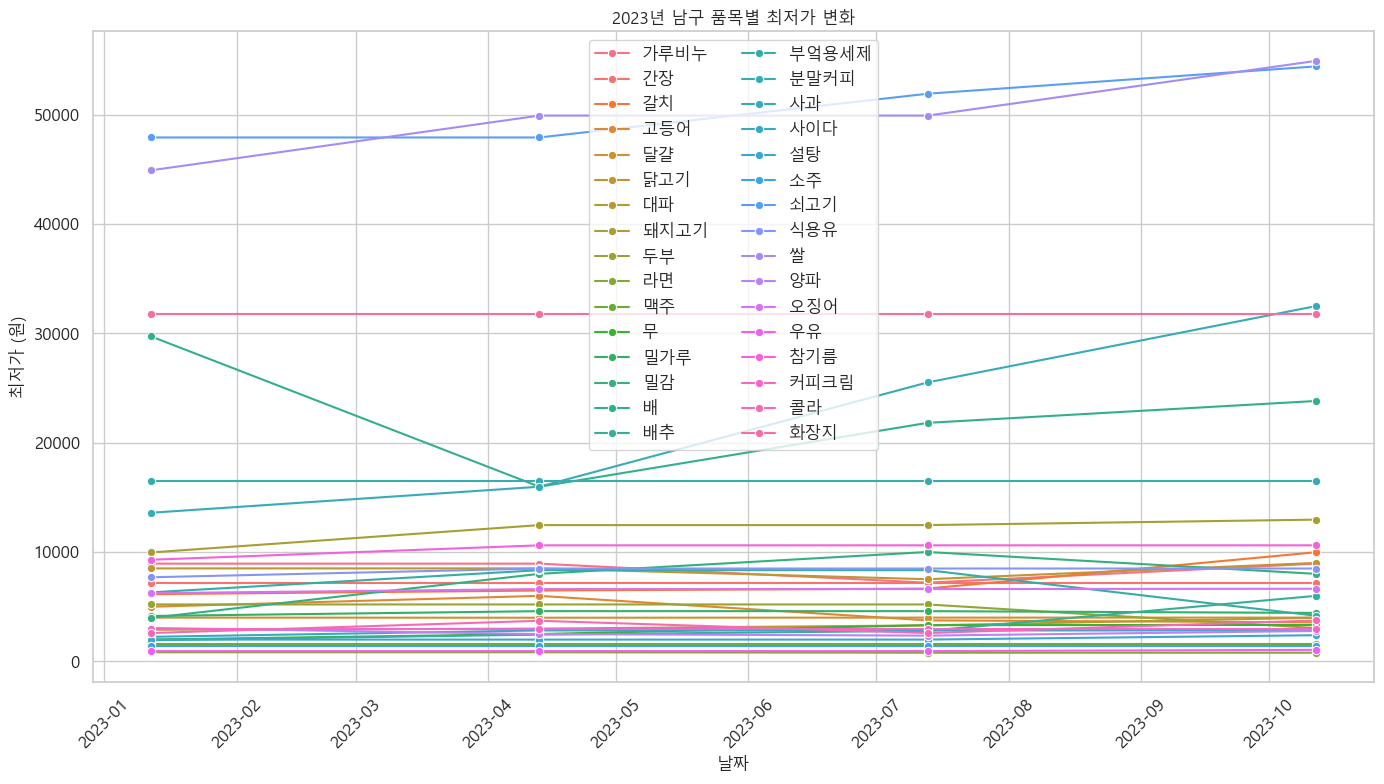

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2023_1q.csv")
q2 = pd.read_csv("남구2023_2q.csv")
q3 = pd.read_csv("남구2023_3q.csv")
q4 = pd.read_csv("남구2023_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2023년 남구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("남구2023_min.csv", index=False, encoding="utf-8-sig")

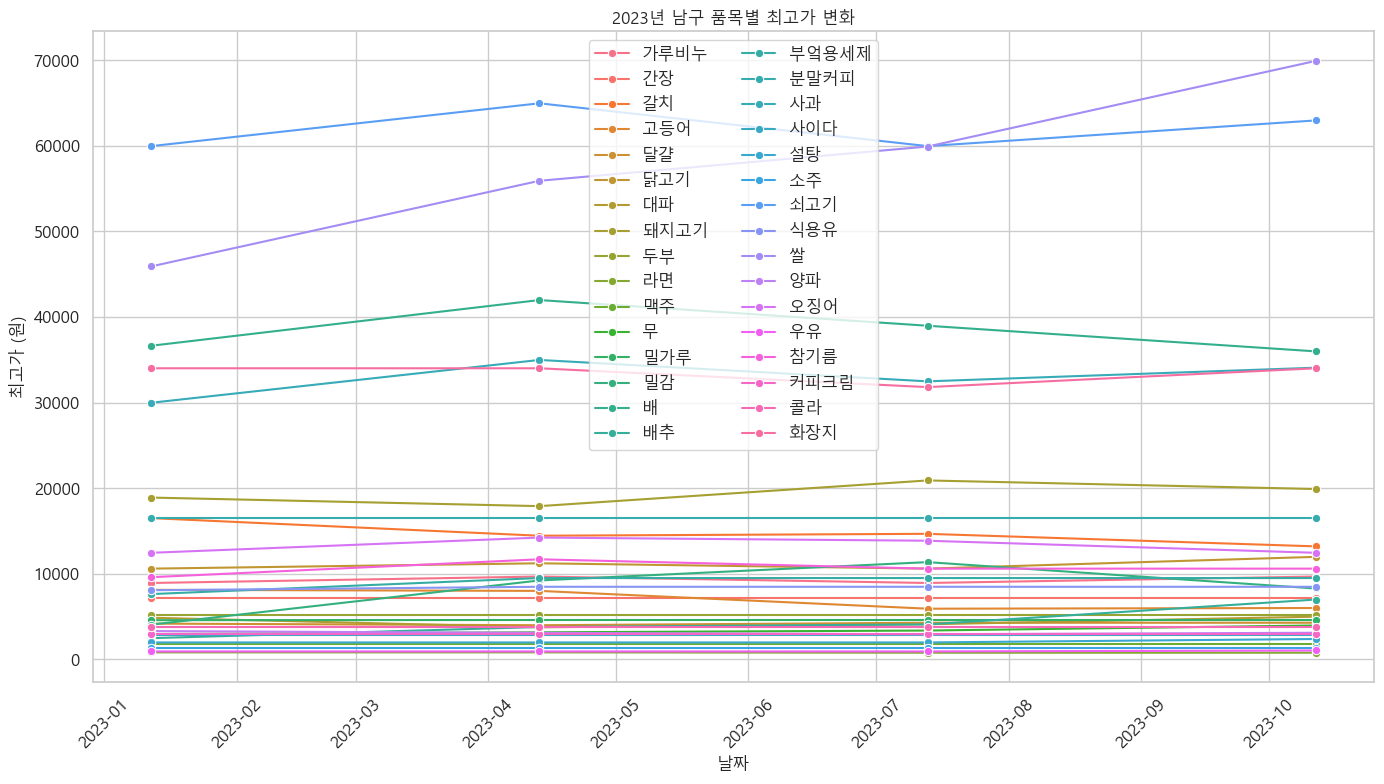

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2023_1q.csv")
q2 = pd.read_csv("남구2023_2q.csv")
q3 = pd.read_csv("남구2023_3q.csv")
q4 = pd.read_csv("남구2023_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2023년 남구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("남구2023_max.csv", index=False, encoding="utf-8-sig")